##### Implementing simple Chatbot using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

##Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [4]:
import os 
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [6]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="openai/gpt-oss-20b")
llm_groq.invoke("Hey I am Anay and I like to play football")

AIMessage(content='Hey Anay! That’s awesome—football is such a thrilling sport. Which position do you usually play? Are you a fan of any particular club or league? If you’ve got any favorite moments or memorable games, I’d love to hear about them!', additional_kwargs={'reasoning_content': 'We need to respond. There\'s no system instruction. The user says: "Hey I am Anay and I like to play football". So we should respond friendly, maybe ask about football, what team, etc. Use natural language.'}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 82, 'total_tokens': 191, 'completion_time': 0.149631909, 'completion_tokens_details': {'reasoning_tokens': 48}, 'prompt_time': 0.004070343, 'prompt_tokens_details': None, 'queue_time': 0.054840717, 'total_time': 0.153702252}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6c14-

### We will start with creating nodes

In [14]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

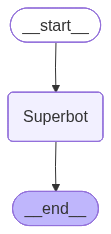

In [15]:
graph=StateGraph(State)

#Node
graph.add_node("Superbot",superbot)

#Edges
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

graph_builder=graph.compile()

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
### Invocation
graph_builder.invoke({'messages':"Hi, My name is Anay and i like FC Barcelona"})

{'messages': [HumanMessage(content='Hi, My name is Anay and i like FC Barcelona', additional_kwargs={}, response_metadata={}, id='660ab2f5-9158-4029-89f0-09c933c5fc46'),
  AIMessage(content='Hello Anay! 👋 It’s great to hear that you’re a fan of FC\u202fBarcelona. Whether you’re into the historic “La Masia” academy, the club’s iconic “Barça” style of play, or the legendary players who have graced Camp Nou, there’s always something exciting happening with the Blaugrana. \n\nDo you have a favorite era or player? Or maybe you’re more into the recent squad and the current season’s prospects? Let me know what you’re most excited about, and we can dive into the latest news, stats, or even some trivia!', additional_kwargs={'reasoning_content': 'User says "Hi, My name is Anay and i like FC Barcelona". We should greet and respond. Probably ask about them. We can talk about FC Barcelona. Provide info.'}, response_metadata={'token_usage': {'completion_tokens': 168, 'prompt_tokens': 83, 'total_toke

### streaming the responses

In [19]:
for event in graph_builder.stream({"messages":"Hello my name is Anay"},stream_mode="updates"):
    print(event)

{'Superbot': {'messages': [AIMessage(content='Hello Anay! 👋 How can I help you today? If you have any questions or need assistance with something, just let me know!', additional_kwargs={'reasoning_content': 'The user says "Hello my name is Anay". They haven\'t asked a question yet. We can respond with a greeting and ask how we can help. Probably follow the policy: we can ask clarifying question. So respond politely.'}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 77, 'total_tokens': 163, 'completion_time': 0.094672802, 'completion_tokens_details': {'reasoning_tokens': 48}, 'prompt_time': 0.00428297, 'prompt_tokens_details': None, 'queue_time': 0.0529804, 'total_time': 0.098955772}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6c1f-6397-7f01-902f-8746fc14734f-0', usage_metadata={'input_tokens': 77, 'output_tokens